In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd

In [3]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
df['target'] = iris.target

In [10]:
import seaborn as sns

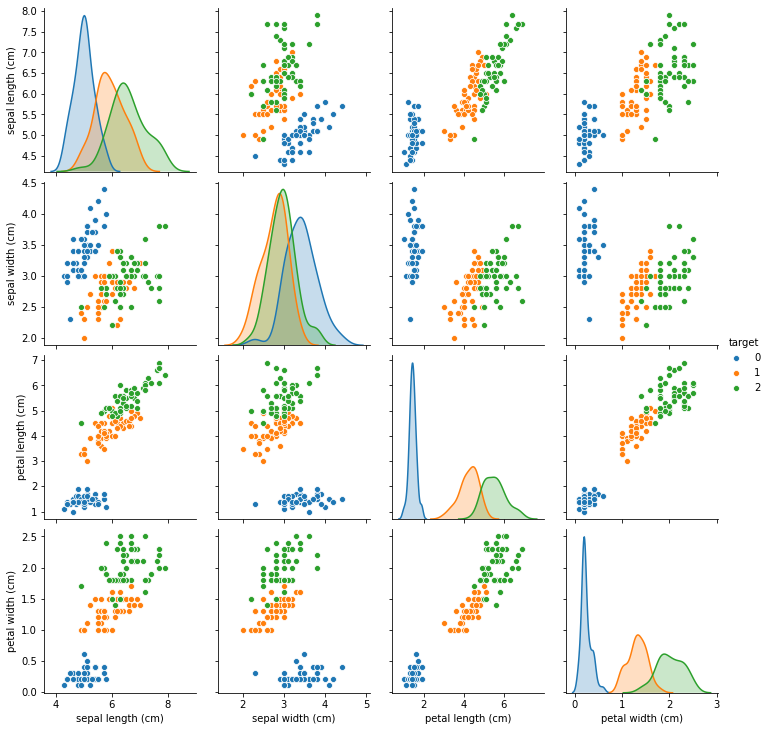

In [20]:
sns.pairplot(df, hue="target")

In [22]:
X = df[iris.feature_names]
Y = df['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, Y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [37]:
knn.score(test_X, test_y)

0.9736842105263158

In [48]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers=[
    KNeighborsClassifier(n_neighbors=5),
    svm.SVC(kernel='linear', C=1.0),
    svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    svm.LinearSVC(C=1.0),
    svm.SVC(kernel='poly', degree=3, C=1.0),
    svm.SVC(kernel='poly', degree=9, C=1.0),
    DecisionTreeClassifier(max_depth=5),
    GradientBoostingClassifier(n_estimators=50, random_state=0)
]

for classifier in classifiers:
    classifier.fit(train_X, train_y)
    print("Classifier: ", classifier)
    print(" score: ", classifier.score(test_X, test_y))
    print("\n\n")

Classifier:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
 score:  0.9736842105263158



Classifier:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 score:  1.0



Classifier:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 score:  0.9736842105263158



Classifier:  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random

/home/guru/bin/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Classifier:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 score:  0.868421052631579



Classifier:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
 score:  0.9473684210526315



Classifier:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
   